## Water Level icin 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset1=pd.read_csv('/Users/gulcinecesasmaz/Desktop/Master_Studies/MDBLUE_DATA/Dataset1_MD_1Y_all.csv')
print(dataset1)
print(dataset1.columns)
print(dataset1.shape)

     Conductivity  timestamps  Water_Level  Dissolved_Oxygen   Ph  \
0           304.0  2024-06-13        43.53               2.3  7.4   
1           309.0  2024-06-15        43.08               2.2  7.6   
2           308.0  2024-06-16        42.87               2.2  7.6   
3           308.0  2024-06-17        42.68               2.2  7.6   
4           308.0  2024-06-18        42.54               2.2  7.6   
..            ...         ...          ...               ...  ...   
352         298.0  2025-06-08        40.77               2.1  7.8   
353         299.0  2025-06-09        40.78               2.1  7.8   
354         298.0  2025-06-10        40.81               2.1  7.8   
355         298.0  2025-06-11        40.81               2.1  7.8   
356         298.0  2025-06-12        40.84               2.1  7.8   

     Temperature        dk  
0           21.3       0.0  
1           21.3    2880.0  
2           21.3    4320.0  
3           21.3    5760.0  
4           21.3    7200.0

In [3]:
waterlevel = dataset1.iloc[:, [1,2]]
print(waterlevel)

     timestamps  Water_Level
0    2024-06-13        43.53
1    2024-06-15        43.08
2    2024-06-16        42.87
3    2024-06-17        42.68
4    2024-06-18        42.54
..          ...          ...
352  2025-06-08        40.77
353  2025-06-09        40.78
354  2025-06-10        40.81
355  2025-06-11        40.81
356  2025-06-12        40.84

[357 rows x 2 columns]


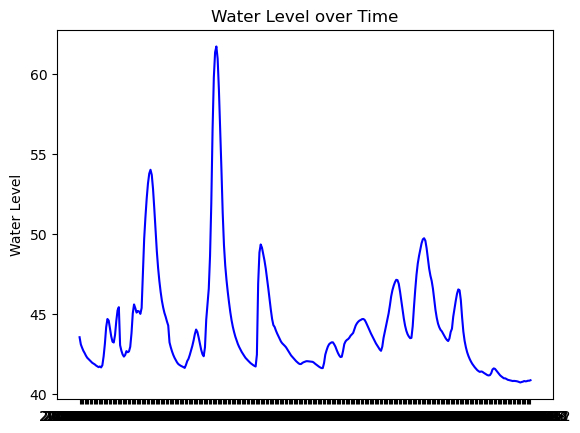

In [4]:
plt.plot(waterlevel['timestamps'], waterlevel['Water_Level'], color='blue', label='Water_Level')
#plt.xlabel('Date')
plt.ylabel('Water Level')
plt.title('Water Level over Time')
#plt.xticks(rotation=45)
plt.show()

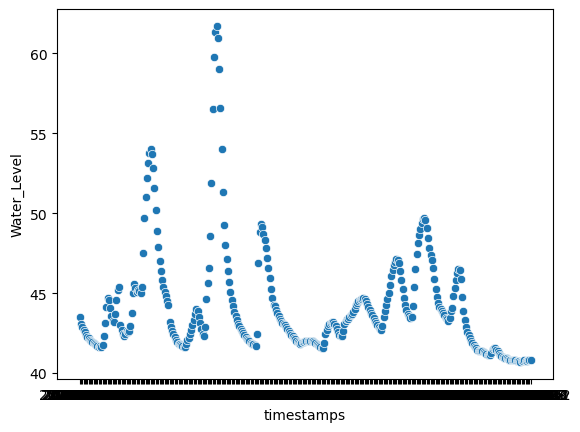

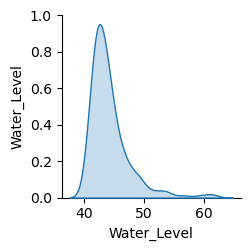

In [5]:
sns.scatterplot(data=waterlevel, x='timestamps', y='Water_Level')
sns.pairplot(waterlevel, vars=['Water_Level'], diag_kind='kde')
plt.show()

In [6]:
print(waterlevel.describe())
print(waterlevel.info())
waterlevel.isnull().sum()

       Water_Level
count   357.000000
mean     44.197255
std       3.406336
min      40.700000
25%      42.010000
50%      43.250000
75%      45.070000
max      61.710000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamps   357 non-null    object 
 1   Water_Level  357 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.7+ KB
None


timestamps     0
Water_Level    0
dtype: int64

## ADF Test (Augmented Dickey-Fuller)
Null Hypothesis (H₀): The series has a unit root → non-stationary

p-value < 0.05 → Reject H₀ → ✅ Stationary

p-value ≥ 0.05 → Fail to reject H₀ → ❌ Non-stationary

✔ So for ADF:

⛳ Small p-value (< 0.05) = Stationary (Good)

🚩 Large p-value (≥ 0.05) = Non-stationary

In [7]:
from statsmodels.tsa.stattools import adfuller
##for temperature, we will investigate the p-value and ADF statistic to be sure it is stationary, otherwise we will need to make it stationary by using differencing.
adf_testing=adfuller(waterlevel['Water_Level'].values)
print('ADF Statistic:', adf_testing[0])
print('p-value:', adf_testing[1])

ADF Statistic: -4.871640973722642
p-value: 3.958890641704887e-05


## KPSS
According to KPSS(Kwiatkowski–Phillips–Schmidt–Shin)test, null hypothesis can not be rejected if p values bigger than 0.05. therefore, it is a non-stationary time series. Null hypothesis for this test says it is stationary. Alternative hypothesis says it is non-stationary.

Null Hypothesis (H₀): The series is stationary

p-value < 0.05 → Reject H₀ → ❌ Non-stationary

p-value ≥ 0.05 → Fail to reject H₀ → ✅ Stationary

✔ So for KPSS:

🚩 Small p-value (< 0.05) = Non-stationary

⛳ Large p-value (≥ 0.05) = Stationary

In [8]:
from statsmodels.tsa.stattools import kpss
testing_kpss = kpss(waterlevel['Water_Level'].values)
print('KPSS Statistic:', testing_kpss[0])
print('p-value:', testing_kpss[1])

KPSS Statistic: 0.2765992124218907
p-value: 0.1


/var/folders/df/732p83n92875l2sf7gcrgzq00000gn/T/ipykernel_5889/2105847924.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  testing_kpss = kpss(waterlevel['Water_Level'].values)


The results show that the Water Level data is stationary.

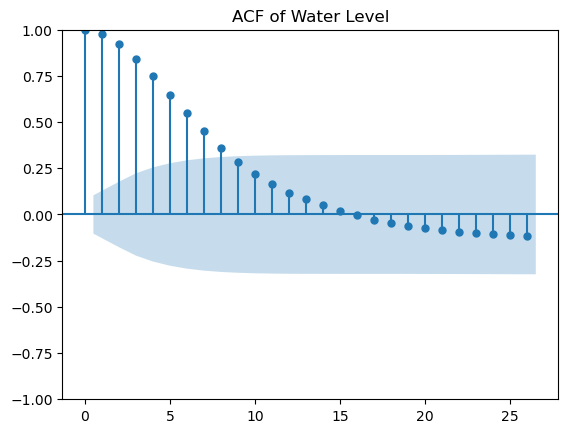

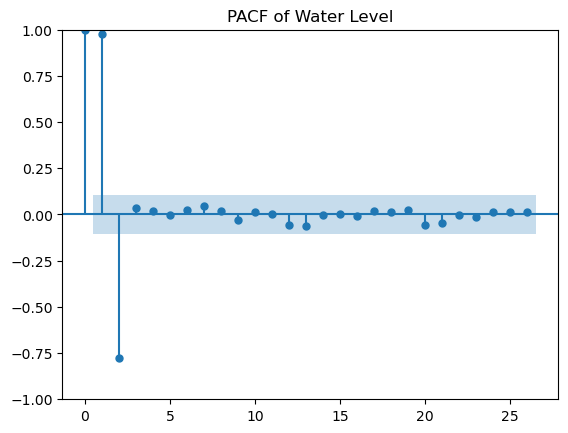

In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(waterlevel['Water_Level'])
plt.title('ACF of Water Level')
plt.show()  
plot_pacf(waterlevel['Water_Level'])
plt.title('PACF of Water Level')
plt.show()

## SARIMAX

In [13]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

In [14]:
sarimax_model=auto_arima(waterlevel['Water_Level'],seasonal=True,m=7)
print(sarimax_model.summary())

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  357
Model:               SARIMAX(3, 0, 0)   Log Likelihood                -165.918
Date:                Wed, 23 Jul 2025   AIC                            341.837
Time:                        15:34:15   BIC                            361.225
Sample:                             0   HQIC                           349.548
                                - 357                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.3928      0.354      3.931      0.000       0.698       2.087
ar.L1          1.9349      0.016    122.195      0.000       1.904       1.966
ar.L2         -1.1459      0.045    -25.489      0.0

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [10]:
test_days=71
train = waterlevel[:-test_days]
test=waterlevel[-test_days:]
print(train)


     timestamps  Water_Level
0    2024-06-13        43.53
1    2024-06-15        43.08
2    2024-06-16        42.87
3    2024-06-17        42.68
4    2024-06-18        42.54
..          ...          ...
281  2025-03-28        45.23
282  2025-03-29        44.74
283  2025-03-30        44.38
284  2025-03-31        44.15
285  2025-04-01        43.99

[286 rows x 2 columns]


In [11]:
print(test)

     timestamps  Water_Level
286  2025-04-02        43.90
287  2025-04-03        43.76
288  2025-04-04        43.61
289  2025-04-05        43.47
290  2025-04-06        43.36
..          ...          ...
352  2025-06-08        40.77
353  2025-06-09        40.78
354  2025-06-10        40.81
355  2025-06-11        40.81
356  2025-06-12        40.84

[71 rows x 2 columns]


## SARIMAX

In [15]:
model = SARIMAX(train['Water_Level'], order=(3,0,0), m=7)
results = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.09193D-01    |proj g|=  1.35160D-02

At iterate    5    f=  6.09177D-01    |proj g|=  1.52606D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      7     12      1     0     0   9.128D-06   6.092D-01
  F =  0.60917714677673540     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['m']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
 This problem is unconstrained.


In [16]:
# Use the last timestamp value, not the integer index
last_obs_date = pd.to_datetime(test['timestamps'].iloc[-1])
# Create 10 future days starting from the last timestamp in test
future_dates = pd.date_range(start=last_obs_date + pd.Timedelta(days=1), periods=30, freq='D')
#print(future_dates)
#print(last_obs_date)
# Forecast 10 steps from the last observed date
forecast = results.forecast(steps=30)
#print(forecast)
# Construct forecast series
forecast_series = pd.Series(forecast, index=future_dates)

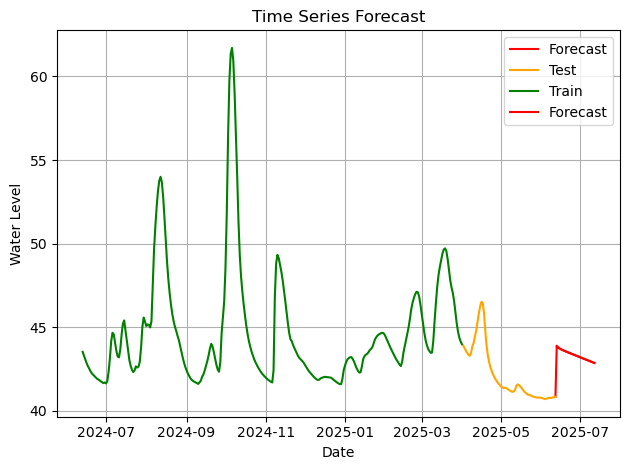

In [18]:
# Ensure timestamps are datetime
test_dates = pd.to_datetime(test['timestamps'])
train_dates = pd.to_datetime(train['timestamps'])
# Extend forecast to start from the last test value for a smooth transition
extended_future_dates = pd.date_range(start=test_dates.iloc[-1], periods=len(future_dates)+1, freq='D')
extended_forecast = pd.concat([pd.Series([test['Water_Level'].iloc[-1]], index=[test_dates.iloc[-1]]), pd.Series(forecast.values, index=future_dates)])

# Use extended_forecast and extended_future_dates for plotting forecast
plt.plot(extended_forecast.index, extended_forecast.values, label='Forecast', color='red')
plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Water Level')
plt.plot(test_dates, test['Water_Level'], label='Test', color='orange')
plt.plot(train_dates, train['Water_Level'], label='Train', color='green')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ARIMA

In [19]:
model_arima = auto_arima(train['Water_Level'], order=(3, 0, 2), m=7)
results_arima = model_arima  # model_arima is already fitted

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/opt/

In [20]:
#Use the last timestamp value, not the integer index
last_obs_date = pd.to_datetime(test['timestamps'].iloc[-1])
# Create 10 future days starting from the last timestamp in test
future_dates = pd.date_range(start=last_obs_date + pd.Timedelta(days=1), periods=30, freq='D')
#print(future_dates)
#print(last_obs_date)
# Forecast 30 steps from the last observed date using predict
forecast = results_arima.predict(n_periods=30)
#print(forecast)
# Construct forecast series
forecast_series = pd.Series(forecast, index=future_dates)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


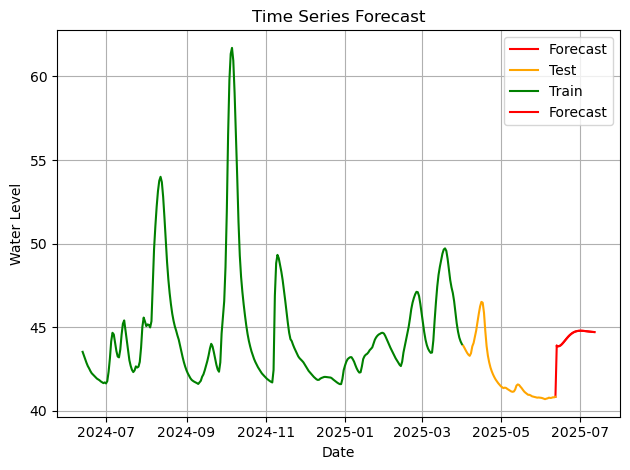

In [21]:
# Ensure timestamps are datetime
test_dates = pd.to_datetime(test['timestamps'])
train_dates = pd.to_datetime(train['timestamps'])
before_future_dates = pd.date_range(start=test_dates.iloc[-1], periods=len(future_dates)+1, freq='D')
before_future_dates_forecast = pd.concat([pd.Series([test['Water_Level'].iloc[-1]], index=[test_dates.iloc[-1]]), pd.Series(forecast.values, index=future_dates)])
plt.plot(before_future_dates_forecast.index, before_future_dates_forecast.values, label='Forecast', color='red')

plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Water Level')
plt.plot(test_dates, test['Water_Level'], label='Test', color='orange')
plt.plot(train_dates, train['Water_Level'], label='Train', color='green')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## AR

In [22]:
test_days=71
train_AR = waterlevel[:-test_days]
test_AR = waterlevel[-test_days:]
print(train_AR)

     timestamps  Water_Level
0    2024-06-13        43.53
1    2024-06-15        43.08
2    2024-06-16        42.87
3    2024-06-17        42.68
4    2024-06-18        42.54
..          ...          ...
281  2025-03-28        45.23
282  2025-03-29        44.74
283  2025-03-30        44.38
284  2025-03-31        44.15
285  2025-04-01        43.99

[286 rows x 2 columns]


In [23]:
from statsmodels.tsa.ar_model import AutoReg

model_arma = AutoReg(train_AR['Water_Level'], lags=1)
results_arma = model_arma.fit()

In [24]:
# Use the last timestamp value, not the integer index
last_obs_date = pd.to_datetime(test['timestamps'].iloc[-1])
# Create 30 future days starting from the last timestamp in test
future_dates = pd.date_range(start=last_obs_date + pd.Timedelta(days=1), periods=30, freq='D')
# Forecast 30 steps ahead using start and end
start = len(train)
end = start + 29
forecast = results_arma.predict(start=start, end=end)
# Construct forecast series
forecast_series = pd.Series(forecast.values, index=future_dates)

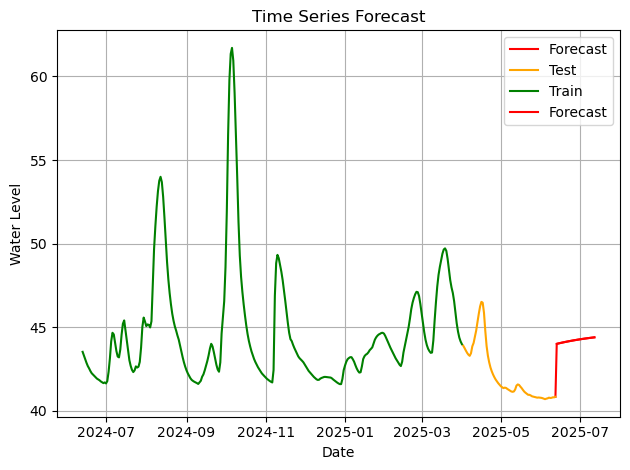

In [31]:
test_dates = pd.to_datetime(test['timestamps'])
train_dates = pd.to_datetime(train['timestamps'])
# Fill the gap between the last test value and the first forecast value
#plt.plot([test_dates.iloc[-1], future_dates[0]], [test['Water_Level'].iloc[-1], forecast.iloc[0]], color='red', linestyle='-', alpha=0.7)
before_future_dates = pd.date_range(start=test_dates.iloc[-1], periods=len(future_dates)+1, freq='D')
before_future_dates_forecast = pd.concat([pd.Series([test['Water_Level'].iloc[-1]], index=[test_dates.iloc[-1]]), pd.Series(forecast.values, index=future_dates)])
plt.plot(before_future_dates_forecast.index, before_future_dates_forecast.values, label='Forecast', color='red')


plt.title('Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Water Level')
plt.plot(test_dates, test['Water_Level'], label='Test', color='orange')
plt.plot(train_dates, train['Water_Level'], label='Train', color='green')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## ARMA

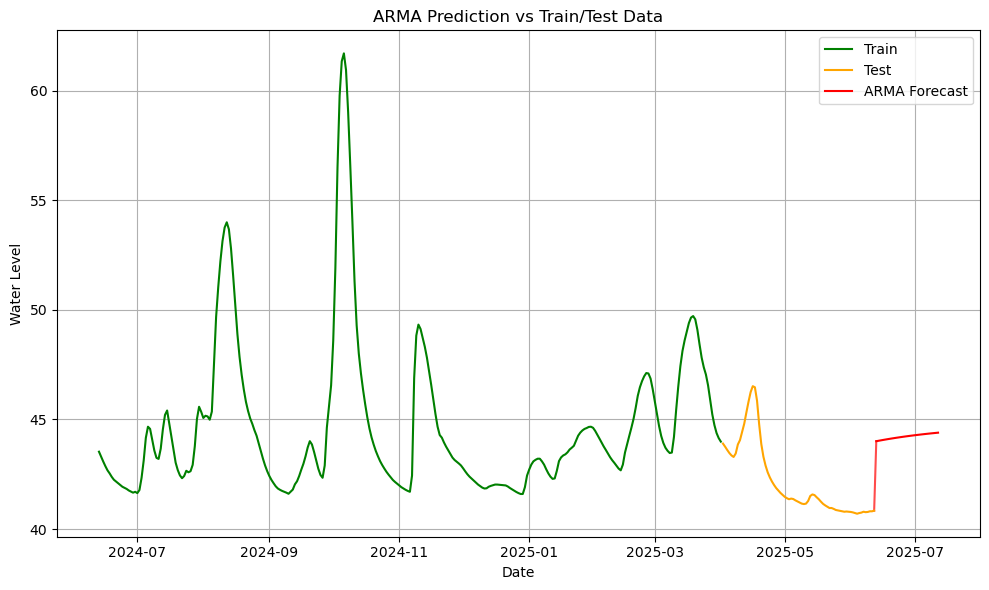

[ 1.00000000e+00  9.76100854e-01  9.13808097e-01  8.24964392e-01
  7.19823255e-01  6.06960585e-01  4.93282665e-01  3.84107568e-01
  2.83299030e-01  1.93434405e-01  1.15991114e-01  5.15388204e-02
 -7.26686681e-05 -3.95372587e-02 -6.79333453e-02 -8.65847186e-02
 -9.69431285e-02 -1.00492711e-01 -9.86754434e-02 -9.28360350e-02
 -8.41841775e-02 -7.37717612e-02 -6.24825696e-02 -5.10319792e-02
 -3.99743246e-02 -2.97157920e-02 -2.05309606e-02 -1.25813859e-02
 -5.93490787e-03 -5.84641886e-04]


In [35]:
import numpy as np
from statsmodels.tsa.arima_process import arma_acf

# AR and MA params must start with 1 (for lag 0)
ar = np.r_[1, -results_arima.arparams()]
ma = np.r_[1, results_arima.maparams()]

# Plot ARMA prediction with train and test dataset
test_dates = pd.to_datetime(test['timestamps'])
train_dates = pd.to_datetime(train['timestamps'])
future_dates = pd.date_range(start=test_dates.iloc[-1] + pd.Timedelta(days=1), periods=30, freq='D')


plt.figure(figsize=(10, 6))
plt.title('ARMA Prediction vs Train/Test Data')
plt.xlabel('Date')
plt.ylabel('Water Level')
plt.plot([test_dates.iloc[-1], future_dates[0]], [test['Water_Level'].iloc[-1], forecast.iloc[0]], color='red', linestyle='-', alpha=0.7)
plt.plot(train_dates, train['Water_Level'], label='Train', color='green')
plt.plot(test_dates, test['Water_Level'], label='Test', color='orange')
plt.plot(future_dates, forecast, label='ARMA Forecast', color='red')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

acf_values = arma_acf(ar=ar, ma=ma, lags=30)
print(acf_values)

## MA

In [36]:
import numpy as np
from statsmodels.tsa.arima_process import arma_acf

# AR and MA params must start with 1 (for lag 0)
ar = np.r_[1, -results_arima.arparams()]
ma = np.r_[1, results_arima.maparams()]

# Plot ARMA prediction with train and test dataset
test_dates = pd.to_datetime(test['timestamps'])
train_dates = pd.to_datetime(train['timestamps'])

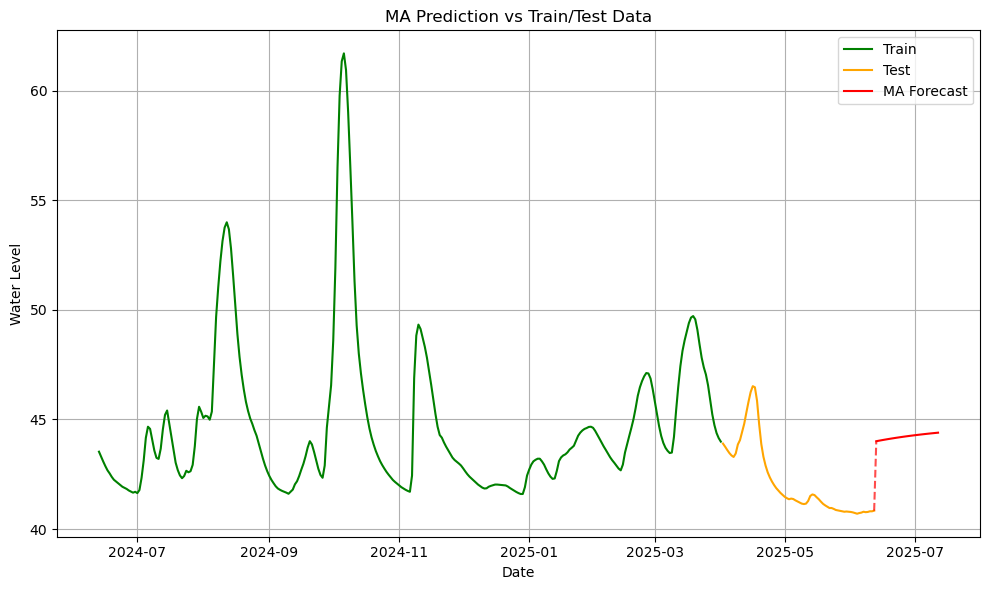

[ 1.00000000e+00  9.76100854e-01  9.13808097e-01  8.24964392e-01
  7.19823255e-01  6.06960585e-01  4.93282665e-01  3.84107568e-01
  2.83299030e-01  1.93434405e-01  1.15991114e-01  5.15388204e-02
 -7.26686681e-05 -3.95372587e-02 -6.79333453e-02 -8.65847186e-02
 -9.69431285e-02 -1.00492711e-01 -9.86754434e-02 -9.28360350e-02
 -8.41841775e-02 -7.37717612e-02 -6.24825696e-02 -5.10319792e-02
 -3.99743246e-02 -2.97157920e-02 -2.05309606e-02 -1.25813859e-02
 -5.93490787e-03 -5.84641886e-04]


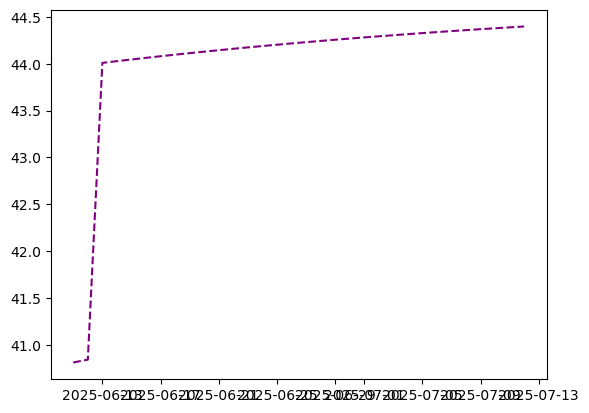

In [39]:
plt.figure(figsize=(10, 6))
plt.title('MA Prediction vs Train/Test Data')
plt.xlabel('Date')
plt.ylabel('Water Level')
plt.plot(train_dates, train['Water_Level'], label='Train', color='green')
plt.plot(test_dates, test['Water_Level'], label='Test', color='orange')
plt.plot(future_dates, forecast, label='MA Forecast', color='red')
plt.legend()
plt.grid(True)
plt.tight_layout()
# Plot the first forecast point at the end of the test set to connect the lines
plt.plot([test_dates.iloc[-1], future_dates[0]], [test['Water_Level'].iloc[-1], forecast.iloc[0]], color='red', linestyle='--', alpha=0.7)
plt.show()
# Extend the MA forecast to start a couple of days before the end of the test set
n_overlap = 2  # number of days to overlap
overlap_dates = test_dates.iloc[-n_overlap:]
overlap_values = test['Water_Level'].iloc[-n_overlap:]
# Concatenate overlap values with forecast
ma_forecast_extended = pd.concat([pd.Series(overlap_values.values, index=overlap_dates), pd.Series(forecast.values, index=future_dates)])
plt.plot(ma_forecast_extended.index, ma_forecast_extended.values, label='MA Forecast (connected)', color='purple', linestyle='--')
acf_values = arma_acf(ar=ar, ma=ma, lags=30)
print(acf_values)